In [2]:
from __future__ import print_function
import trees
import treePlotter

# load data

In [6]:
myDat, labels = trees.createDataSet()
ent = trees.calcShannonEnt(myDat)
print(ent)

0.970950594455


# test entropy

In [7]:
myDat[0][-1] = 'maybe'
print(myDat)
print(trees.calcShannonEnt(myDat))

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
1.37095059445


# split dataset

In [8]:
myDat[0][-1] = 'yes'
myDat, labels = trees.createDataSet()
split1 = trees.splitDataSet(myDat, 0, 1)
print(split1)
split2 = trees.splitDataSet(myDat, 0, 0)
print(split2)

[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


# choose best feature

In [9]:
best_feature = trees.chooseBestFeatureToSplit(myDat)
print('best feature:', best_feature)

best feature: 0


# build trees

In [8]:
myTree = trees.createTree(myDat, labels)
print("trees: ", myTree)

('trees: ', {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}})


# plot tree

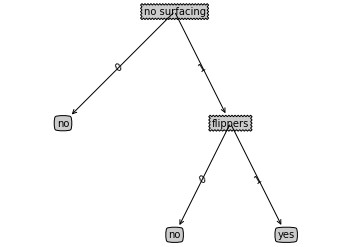

In [10]:
myTree = treePlotter.retrieveTree(0)
treePlotter.createPlot(myTree)

# plot another tree

new tree:  {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}


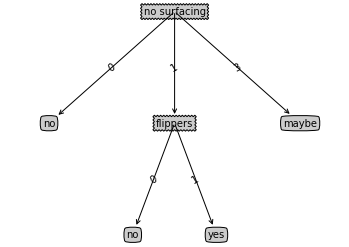

In [12]:
myTree['no surfacing'][3] = 'maybe'
print('new tree: ', myTree)
treePlotter.createPlot(myTree)

# classify labels

In [13]:
myDat, labels = trees.createDataSet()
print('labels: ', labels)

myTree = treePlotter.retrieveTree(0)
print("tree: ", myTree)

trees.classify(myTree, labels, [1,0])

labels:  ['no surfacing', 'flippers']
tree:  {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


'no'

# store and load tree

In [14]:
trees.storeTree(myTree, 'classifierStorage.txt')
trees.grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# load lenses data

lenses tree:  {'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}, 'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}}}}}


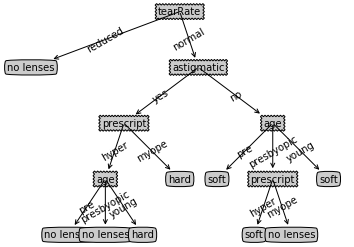

In [15]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = trees.createTree(lenses, lensesLabels)
print('lenses tree: ', lensesTree)

# plot tree
treePlotter.createPlot(lensesTree)